In [1]:
from numpy import mean,std
from matplotlib import pyplot
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import SGD
from numpy import array
from glob import glob

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train.min(),x_train.max()

(0, 255)

In [7]:
y_train.min(),y_train.max()

(0, 9)

In [8]:
#Normalizing dataset
x_train=x_train/255.0
x_test=x_test/255.0

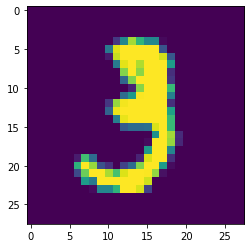

In [9]:
plt.imshow(x_train[10])

In [10]:
y_train[10]

3

In [11]:
#Defning an Object (Initiallizing RNN)
model=tf.keras.models.Sequential()

In [12]:
#Adding 1st LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='relu',return_sequences=True,input_shape=(28,28)))

#Adding dropout layer
model.add(tf.keras.layers.Dropout(0.2)) #Dropout layer is a regularization technique which will avoid overfitting.

In [13]:
#Adding 2nd LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='relu')) #We have removed return_sequences because we are not adding anymore LSTM layers after this and also we are adding Dense layer after this so we wont
#be needing anymore LSTM layer

#Adding dropout layer
model.add(tf.keras.layers.Dropout(0.2)) #Dropout layer is a regularization technique which will avoid overfitting.

In [14]:
#FC LAYERS.
model.add(tf.keras.layers.Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [15]:
#Adding output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#For binary output we use activation function as Sigmoid
#For multiple outputs we use activation function as softmax

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [18]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 118s 60ms/step - loss: 0.6734 - accuracy: 0.7761 - val_loss: 0.1759 - val_accuracy: 0.9496
Epoch 2/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.1642 - accuracy: 0.9541 - val_loss: 0.1068 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1155 - accuracy: 0.9694 - val_loss: 0.0778 - val_accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0914 - accuracy: 0.9761 - val_loss: 0.0593 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0712 - accuracy: 0.9809 - val_loss: 0.0612 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0616 - accuracy: 0.9837 - val_loss: 0.0441 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0535 - accuracy: 0.9852 - val_loss: 0

In [39]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [40]:
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [41]:
print(y_predict[10],y_test[10])

0 0


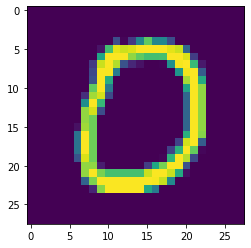

In [25]:
plt.imshow(x_test[10])

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[ 975    0    0    0    0    1    1    1    2    0]
 [   0 1132    2    0    0    0    0    1    0    0]
 [   1    0 1025    1    0    0    0    4    1    0]
 [   0    0    4 1000    0    4    0    1    0    1]
 [   0    0    0    0  974    0    4    0    0    4]
 [   1    1    0    7    0  877    2    0    2    2]
 [   2    2    0    0    0    1  952    0    1    0]
 [   0    4    8    1    1    0    0 1012    1    1]
 [   2    0    1    1    0    1    0    3  966    0]
 [   0    0    0    0   13    0    0    3    5  988]]


In [43]:
acc_s=accuracy_score(y_predict,y_test)
print(acc_s)

0.9901


In [44]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

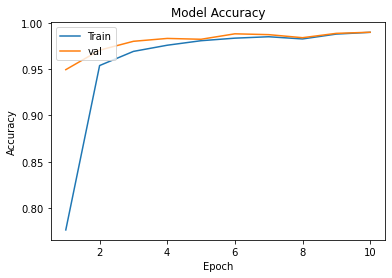

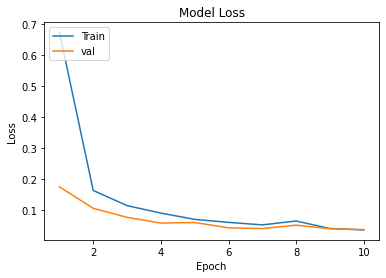

In [45]:
learning_curve(history,10)